# Palmer Penguins
***

This notebook contains an analysis of the Palmer penguin [dataset](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv) (Horst AM, Hill AP, Gorman KB, 2020). Data was collected by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER (Long Term Ecological Research Network).

This dataset was created as a introductory dataset for data analysis and exploration. More about the dataset can be found [here.](https://allisonhorst.github.io/palmerpenguins/)

![penguins](./img/peng-2.png#center)

The datsaset documents three penguin species in the Palmer Archipelago, Antarctica.

![palmer achipelago](https://upload.wikimedia.org/wikipedia/commons/1/15/Palmer_archipelago%2C_Antarctica.jpg)

In order to explore the dataset we must first read in the dataset from a csv file. This can be done with a library called [Pandas](https://pandas.pydata.org/docs/getting_started/overview.html). Pandas is an open source data analysis library for Python. Under the hood is [NumPy](https://numpy.org/), a library for operating on large arrays and matrices.

Before we can use Pandas, we must import it. Note in the cell below how the name Pandas is abbreviated to 'pd', for ease of use later.

In [2]:
# import the pandas library
import pandas as pd

With Pandas imported, we can now load the dataset into a [dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). A dataframe is a two dimensional data structure similar to a spreadsheet. It contains rows and columns just like a spreadsheet does.

In [3]:
# load csv
df = pd.read_csv("./palmerpenguins_dataset.csv")

Now that Pandas has read the dataset in as a dataframe, what can we do with it? How can we view the data? How can we perform math on the data inside? How can we plot the data?

[*10 minutes to pandas*](https://pandas.pydata.org/docs/user_guide/10min.html#basic-data-structures-in-pandas) is a great introductory overview of the functionality Pandas provide for working with dataframes.

Pandas docs have a good overview of basic operations [here](https://pandas.pydata.org/docs/reference/frame.html).

One of the first things to do would be to have a quick look inside. The dataframe may be too large to display, so there is a built in function to display a small version of the table - just the top and bottom:

In [4]:
# view a small version of the dataframe
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


We can see the column names. We can see how many rows there are in total. We also see that some entries are missing, represented by NaN. 

In [5]:
# view the first row in the dataframe
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In the first row we see all the data related to a single penguin. Its a male penguin weighing almost 4 kilograms, observed on the Torgersen island. Note that the data type is defined as an 'object'.

We can see what other datatypes are in the dataframe:

In [11]:
# view datatypes
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Some entries are objects and some are float64. What does that mean? Something about strings and numbers.

Let's have a quick look at the olumn names again, also known as headers:

In [13]:
# view headers 
df.columns.tolist()

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

We can see the column headings, one of which is the sex of the penguin.

Let's try make a barchart to see how many of the penguins in the dataset are male and how many are female.


- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html

In [ ]:
# count the number of unique entries in each of the columns
df.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

This has counted the number of unique entries in each column. I need to count how many of each unique entries there are. Maybe with Dataframe.count:
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html

In [ ]:
# count how many entries there are under each column
df.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
dtype: int64

There must be missing entries as some columns have more entries than others. 

The function "value_counts()" counts the number of values for each of the unique entries in a column.
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html#pandas.DataFrame.value_counts

In [14]:
# count number of unique vales
df['sex'].value_counts()


sex
MALE      168
FEMALE    165
Name: count, dtype: int64

Pandas has a buoilt in plot function 'plot'. This uses another package call matplotlib.

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html

<Axes: xlabel='sex'>

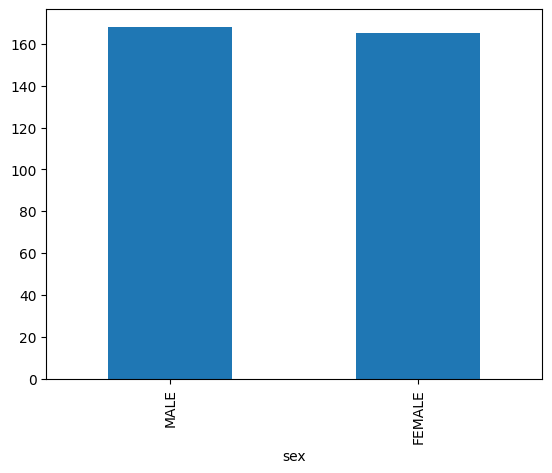

In [23]:
gender_counts = df['sex'].value_counts()

# tehn plot the gender counts
gender_counts.plot.bar()

<Axes: xlabel='sex'>

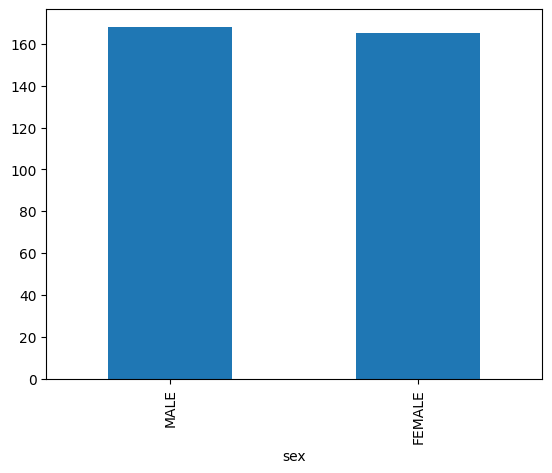

In [24]:
# or we could just stick those two together 
df['sex'].value_counts().plot.bar()

```js example-bad
const greeting = "I'm a bad example";

Species might be a better thing to barchart ...

# Markdown stuff

Some examples pulled from:
- https://developer.mozilla.org/en-US/docs/MDN/Writing_guidelines/Howto/Markdown_in_MDN

> **Warning:** This is how you write a warning.
>
> It can have multiple paragraphs.

> **Note:** This is how you write a note.
>
> It can have multiple lines.

- term1

  - : My description of term1

- `term2`

  - : My description of term2

    It can have multiple paragraphs, and code blocks too:

    ```js
    const thing = 1;
    ```


| Heading 1 | Heading 2 | Heading 3 |
| --------- | --------- | --------- |
| cell 1    | cell 2    | cell 3    |
| cell 4    | cell 5    | cell 6    |


species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


<Axes: xlabel='species'>

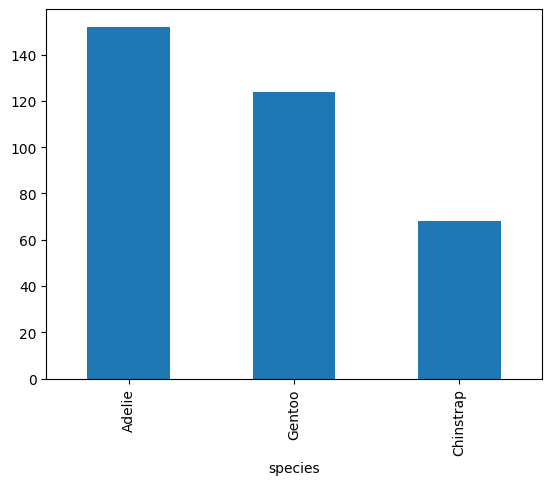

In [ ]:
species_count = df['species'].value_counts()
print(species_count)

# plot
species_count.plot.bar(x='species')

Stacked barcharts look pretty cool, look into those. Maybe do average weight stacked on each species.

Do some averages
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html

Writing math formula:
- https://docs.github.com/en/get-started/writing-on-github/working-with-advanced-formatting/writing-mathematical-expressions

This sentence uses `$` delimiters to show math inline:  $\bar{x} = \frac{sum of data points}{\# of data points}$

$$\bar{x} = \frac{sum of data points}{\# of data points}$$

Use double \$\$ to center:

**Mean**
$$\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}$$

In [ ]:
# calculate the mean of each of the numeric columns in the dataframe
df.mean(numeric_only=True)

bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64

This is average of all species, need to figure out how to do average of each species, then stack on barchart
- https://stackoverflow.com/questions/39403705/mean-of-values-in-a-column-for-unique-values-in-another-column



calculate mean for one column only:

In [ ]:
# calculate the mean of a specific column
df['body_mass_g'].mean()

4201.754385964912

link above suggests "group_by" function
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

so we first do a group_by thing(), then do the maen() of the entries of another column that are associated with each group 

- https://www.statology.org/pandas-mean-by-group/

In [31]:
# group by species and then use mean() function to calculate the mean body weight for each unique species entry
df.groupby('species')['body_mass_g'].mean()





species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

<Axes: xlabel='species'>

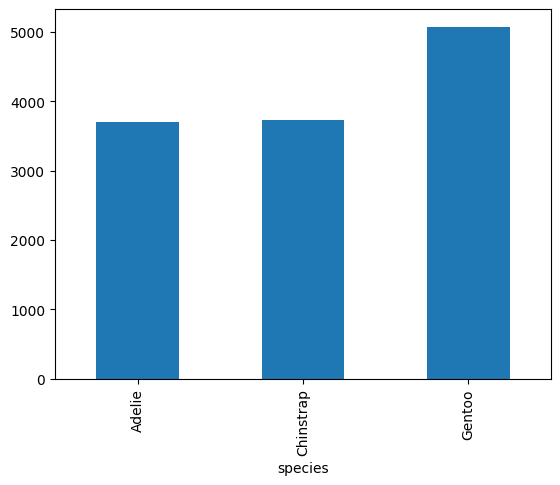

In [26]:
# save mean by species to a variable 
avg_weight_by_species = df.groupby('species')['body_mass_g'].mean()

# then plot
avg_weight_by_species.plot.bar()

Mean, median, and mode?
- https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/mean-median-basics/a/mean-median-and-mode-review

df.describe does a cool statistics overview
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

this only includes numerics, unless told otherwise

In [ ]:
# view statistics overview
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


heatmaps look cool, matplotlib or seaborn. uses df.corr
- https://statisticsglobe.com/plot-correlation-matrix-matplotlib-seaborn-python

<Axes: >

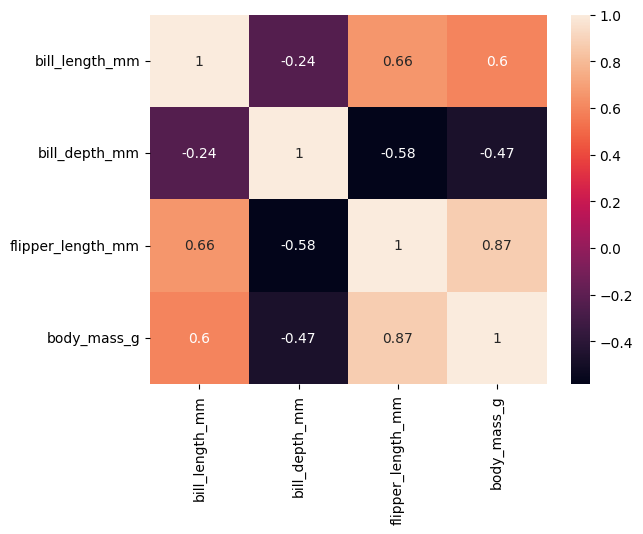

In [32]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

It appears strings mess it up. Need to use numerics only. We can use the data type information to select numerics only - float64 and int64.

In [30]:
# show numeric only data
df.select_dtypes(include=['float64', 'int64'])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


***

### End